# Homework 1

**DUE Monday, OCT 11th by 11:59PM**

The homework in this course is distributed and submitted as iPython notebooks. 

In an iPython notebook, chunks of codes or texts are executed in individual cells. Texts are written in Markdown cell, as you can see in the homework instructions below. Codes are written in code cells. Cells are run one at a time. You can change the cell type by navigating to Cell -> Cell Type.

There are spaces for you to enter your answers to the questions, either in code or text. Feel free to add more cells if you need (likely).

In many parts, some Scikit-learn functions and classes have already been imported to give you leads on what you may need to use. You still need to refer to the Scikit-learn documentation to learn how the classes and methods work. You are free to use other Python data science libraries (NumPy, Pandas, SciPy, Matplotlib/Seaborn, statsmodel, etc). If you are not sure if a library is accepted, please ask.

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures** to **GradeScope**. Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

## Problem 1

In this problem, you will practice training and evaluating a machine learning model on a simple dataset with Scikit-Learn. We will use the Decision Tree algorithm to demonstrate a typical training process.

Simply put, the idea of training a predictive model is that, given the available data, we want the model to learn the relationship between some underlying patterns within the data and the expected outputs. We hope that after the learning process, the model will be able to reliably predict the outputs of future unseen data.

How do we estimate our model's performance on future unseen data even though we do not have access to such data at the moment? If we can safely assume that the future data follows the same distribution as our training data, we can simulate the future scenario by splitting our available data into a training set and a testing set. We train our model on the training set and evaluate it on the testing set, which serves as a proxy for future data because our model never sees the examples from the testing set during training.

If we assume the future data follows the same distribution as our current data, why bother splitting? We can just use the model's training performance as the estimate for future performance. This is actually not true. After all, the current data and the future data are just 2 samples of a distribution so there are still differences and variations between them. You may have a "lucky" training set that leads to high training performance. Worse, your machine learning model may have memorized the specific details of the current dataset instead of figuring out the general patterns. In that case, we say the model has overfitted the training data. Overfitted model performs poorly on unseen data that it has not "memorized" yet. 

a) Load the data from '**bean.csv**', which is a dataset for predicting bean shapes. There are 13611 learning examples, 17 features, and 4 classes. The first row contains the names of the columns and the last column contains the labels. Store the data and the labels in variables ***X*** and ***y***, respectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
beans = pd.read_csv('bean.csv')
x = beans.iloc[:,:16]
y = beans.iloc[:,16]

Split the data into a training set and a testing set. Use 80% of the data for training and the remaining 20% for testing.

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.2, random_state = 42)

Initiate a Decision Tree model from Scikit-Learn. Fit the model on the training set. Print the training performance.

In [4]:
np.random.seed(57)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier() 
tree.fit(xtrain,ytrain)
tree.score(xtrain,ytrain)

1.0

Evaluate the model on the testing set. Print the testing performance. Is the testing performance the same as the training performance?

In [5]:
tree.score(xtest,ytest)

0.8920308483290489

**Answer**: _No, the testing performance isn't the same as the training performance. Since the Decision tree was initialized using the training data, it is gonna be a perfect 1 for performance. However since the testing data isn't the same as the training data, it is expected that the perfromance will not work as well for the testing data._

Now that have a routine for evaluating our model, is it enough to conclude about our model performance? To be more specific, assume that we have a training set **A** and a testing set **B**. If we train **Decision Tree** model and a **Support Vector Machine** model on **A** and evaluate them on **B**, can we say **Support Vector Machine** is better or worse than **Decision Tree** based on their training performances on **A** or testing performances on **B**? The answer is no because **A** and **B** are just one scenario. We may just have a scenario that is more favorable for **Support Vector Machine** than for **Decision Tree**. To reliably conclude whether a machine learning algorithm is better than another for a specific problem, we need to collect results from multiple scenarios and compare the average performance. Since we only have limited data available to us, we need to use **multi-fold cross-validation** to create multiple **train-validation** scenarios (**Notice**: we use the term **train-validation** instead of **train-test** in **cross-validation** for a reason we will mention in **Problem 3** where we touched model tuning).

In **multi-fold cross-validation**, the dataset is splitted into multiple folds of equal size. Each iteration, we pick a fold to be a **validation set** and let the combination of the remaining folds be the **training set**. For example, in **5-fold cross-validation**, we can create **5** different **train-validation** scenarios. Note that for each scenario, you have to reinitiate your model and start training from scratch.  

b) Split the dataset into **5 folds** and store them (for example, a list of lists). Remember to shuffle the data before splitting so that each fold has a reasonable number of examples from different classes. You must do the splitting without any libraries. 

In [6]:
# shuffling the dataset
shuffled = beans.sample(frac = 1)
shuffled.head()

# split into 5 folds
fold1 = shuffled.iloc[0:2722]
fold2 = shuffled.iloc[2722:2722*2]
fold3 = shuffled.iloc[2722*2:2722*3]
fold4 = shuffled.iloc[2722*3:2722*4]
fold5 = shuffled.iloc[2722*4:]

For each **train-validation** scenario, initiate a new **Decision Tree** model, train it on the **training set** and evaluate it on the **validation set**. Record the training performances and testing performances of all scenarios.

In [7]:
train_performance = []
validation_performance = []
for i in range(5):
    # initialize all the folds as a list
    all_folds = [fold1,fold2,fold3,fold4,fold5]
    
    # set one of the folds as the validation set
    valid = all_folds[i]
    
    # change the value of the list so it doesnt include the current validation fold
    all_folds.pop(i)
    
    # set the training set as the rest of the data
    train = pd.concat(all_folds)
    
    # set the features and classifiers for the training and validation sets
    xtrain = train.iloc[:,:16]
    ytrain = train.iloc[:,16]
    xvalid = valid.iloc[:,:16]
    yvalid = valid.iloc[:,16]
    
    # initiate Decision Tree
    tree = DecisionTreeClassifier()
    
    # train on training set
    tree.fit(xtrain, ytrain)
    
    # get training performance
    train_performance.append(tree.score(xtrain,ytrain))
    
    # get the validation performance
    validation_performance.append(tree.score(xvalid,yvalid))
    
# print out the performance for both sets
performance_df = pd.DataFrame({'Scenario':range(1,6),
                               'Training Performance':train_performance,
                               'Validation Performance':validation_performance})
performance_df

,Scenario,Training Performance,Validation Performance
0,1,1.0,0.897502
1,2,1.0,0.898604
2,3,1.0,0.891624
3,4,1.0,0.890889
4,5,1.0,0.883952


c) On a same figure, plot the **training performances** and validation performances from different scenarios. Specifically, the x-axis shows the scenarios and the y-axis shows the performance. There should be a line for training performances and a line for validation performance.

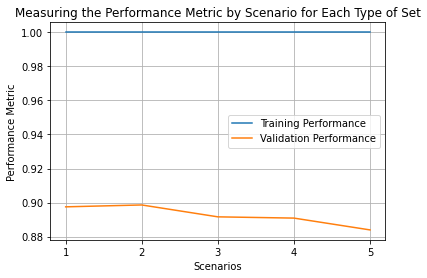

In [8]:
plt.xticks(range(1,6))
plt.plot(range(1,6),train_performance, label = 'Training Performance')
plt.plot(range(1,6), validation_performance, label = 'Validation Performance')
plt.grid(True)
plt.legend()
plt.xlabel('Scenarios')
plt.ylabel('Performance Metric')
plt.title('Measuring the Performance Metric by Scenario for Each Type of Set')
print('')

How do the performances differ across different train-validation splits? How are the validation performances compared to the training performances in general? What may be the reason?

**Answer**: _In general, the performances do not differe much across different train-validation splits, or in this case each scenario. The Training performance is consistently at 1 for each scenario while the Validation performance hovers between 0.88 and 0.9. The reason for the consistently lower performance values with the Validation sets compared to the Training sets is because the model is fitted using the training set. Since this is the case, it will be difficult to perfectly fit to the new validation data which decreases its performance._

## Problem 2

**Cross-validation** is useful for comparing different algorithms. In a similar way, **cross-validation** can also be used to tune your learning model. If you take a look at the **Scikit-Learn** documentation of **Decision Tree**, you can see there are many parameters that we can specify when initiating a model. These are called **hyper-parameters** because they are not learned by the model but control how the model learns. You can think of the model as a learning machine and the **hyper-parameters** as knobs to configure the machine. Depending on how you choose the values of these **hyper-parameters**, the resulting model may have varying performances. We can use **cross-validation** to compared between different models of the same learning algorithm but with different **hyper-parameter settings**. 

Which values should we specify for the **hyper-parameters** of our learning algorithm? That depends on the task. As data scientists, we need to understand the mearning of each **hyper-parameter** and the effect it may have on the learning process. For this problem, you are free to consult any learning resource but you need to answer in your own words.

a) Explain the meanings and effects of the following hyper-parameters of **Decision Tree**. The effects mean what happen when you varies the value of a hyper-parameter:


*   Maximum depth
*   Split criterion



**Answer - Max Depth**: _Maximum depth refers to the theoretical maximum size your decision tree can be, which is one less than the number of training samples. If you decrease the value of the maximum depth, it will be too simple and have a high bias. On the other hand, if you increase the maximum depth, the model will tend to overfit and it will be hard to generalize to new unseen data._

**Answer - Split Criterion**: _Split Criterion refers to the function to measure the quality of a split. The two different criteria are entropy and gini impurity. Entropy is a measure of information gain and the Gini is a measure of a specific variable that is wrongly being classified when chosen randomly and a variation of gini coefficient. For entropy, the goal is to have the highest information gain which is a reduction in entropy after choosing a specific attribute. For the Gini Impurity score, we obtain values from 0-1 ranging from all elements stemming from one class to all classes being randomly distributed across different classes. It is preferred that the gini index is lower since it is the most pure at 0. Choosing between Gini and Entropy is a trade off between accuracy and runtime. By choosing Entropy as your split criterion, you're sacrificing a higher runtime for much more accuracy._

b) Explain the meanings and effects of the following hyper-parameters of **Random Forest**. The effects mean what happen when you varies the value of a hyper-parameter:


*   Number of base learners/ estimators
*   Maximum number of test features



**Answer - Base Learners**: _Base Learners, or more widely known as weak learners, form the foundation of creating much more complex machine learning models. Since the point of ensemble methods like random forest is to use multiple decision trees to create a strong model, the variance decreases as the number of learners increase. However, since the random forest algorithm is sampling with replacement, and we are using only part of the data to create a singluar tree, there is more bias when we increase the number of base learners. Although having a higher number of base learners seems to be a better way to go, it really doesn't improve performance the higher the number of learners. In addition, having a higher number of estimators effects the run time since more computations are being done._

**Answer - Test Features**: _Test features are the sort of filters that determine specific classification. The goal of feature selection is to chose the features that are the most pure. Using every single feature in each tree of the random forest would make the model more prone to overfitting have have high variance. Meanwhile using very few features for each tree in the random forest would make the model too generalized and biased._ 

## Problem 3

In this problem, we will implement hyper-parameter tuning for both Decision Tree and Random Forest. 

Remember we distinguished between **test** and **validation** in Problem 1? Here is the reason. Typically, while tuning the hyperparameters, the model is not allowed to see the testing set. If we use the performance of the model on the testing set to guide the hyper-parameter tuning, our model's configuration will be biased towards the examples in the testing set. As a result, our model's testing performance is no longer a proxy for its performance on future unseen data. As a rule of thumb, no test data is allowed during training and tuning a machine learning model.

To guide our model through hyper-parameter tuning, we need to further reserve a portion of our data as the **validation set**. In total, we split our data into 3 sets: a **training set**, a **validation set**, and a **test set**. Our model will be trained on the **training set** and evaluated on the **validation set**. Based on the model's **validation performance**, we make changes to the values of its **hyper-parameters**, a.k.a **tuning**, and repeat the train-validation process. Once we are happy with the hyper-parameters of our model, we can now test it on the testing set and use the result as a proxy for future performances.

We can do even better. Instead of only one train-validation scenario, we can create multiple train-validation scenarios via **cross-validation**. The **average performance** of the model on the scenarios is used to guide the tuning process.

<br>
<center>
<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png' width=600 height=400>
</center>
<br>


**Hyper-parameter tuning** consists of cross-validation nested within an outer loop that iterates through a list of hyper-parameter combinations. For example, if each hyper-parameter set consists of 2 hyper-parameters **Maximum depth** and **Split criterion**. If we want to check **Maximum depths** in [1,2,3,4,5] and **Split criteria** in ["gini","entropy"] then there are **2 x 5 = 10 hyper-parameter combinations**. For each combination, we initiate a model with the corresponding hyper-parameters and record the cross-validation average performance.


First, let's again import our data from '**bean.csv**. Split the data into a **training set** (80%) and a **testing set** (20%). We will do **hyper-parameter tuning** via **cross-validation** on the training set.

In [9]:
np.random.seed(83)
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.2, random_state = 67)

a) Let us try a simple tuning for the hyper-parameter **Maximum depth** of **Decision Tree**. The values of the depth are in [2,3,5,8,15]. For the cross-validation step, you can use the **cross_validate** function from **Scikit-Learn**. Record the average training performance and testing performance for each value of depth.

In [10]:
np.random.seed(98)
from sklearn.model_selection import cross_validate

#create a list to store the training and validation performance at each depth
trainperfs = []
validperfs =[]

# depth values
depth = [2,3,5,8,15]

# loop through all the depth values
for val in depth:
    
    # create the new Tree instance
    tree = DecisionTreeClassifier(max_depth = val)
    
    # obtain training & testing performance
    trainperf = cross_validate(tree,xtrain,ytrain, cv = 5, return_train_score = True)
    
    # append mean ofr each performance to their list
    trainperfs.append(np.mean(trainperf['train_score']))
    validperfs.append(np.mean(trainperf['test_score']))

performance_df = pd.DataFrame({'Max Depth':depth,
                               'Training Performance':trainperfs,
                               'Validation Performance':validperfs})
performance_df  

,Max Depth,Training Performance,Validation Performance
0,2,0.654964,0.652367
1,3,0.778242,0.775345
2,5,0.889879,0.879679
3,8,0.941495,0.902737
4,15,0.993984,0.898513


Plot the **training performances** and **testing performances** versus the **maximum depths**. What are the general trends. What may be the reason?

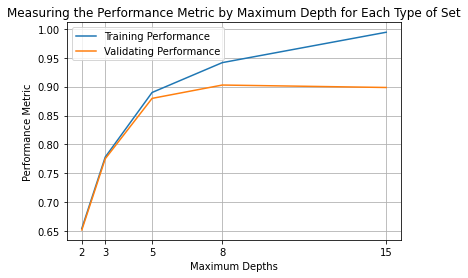

In [11]:
plt.xticks(depth)
plt.plot(depth,trainperfs, label = 'Training Performance')
plt.plot(depth, validperfs, label = 'Validating Performance')
plt.grid(True)
plt.legend()
plt.xlabel('Maximum Depths')
plt.ylabel('Performance Metric')
plt.title('Measuring the Performance Metric by Maximum Depth for Each Type of Set')
print('')

**Answer**: _Based on the plot above, we see that as we increase the maximum depths, the performance for both training and testing sets also increase. There is a steep increase from the maximum depths from 2-5, but as we increase from 5-15, the trend flattens out a little after 5. As far as the difference between the training and testing perfromances, they first start out being very similar and then separate at around a 5 maximum depth value. While the training perfromance increases slightly as the maximum depths increase, the validating performance stays around the same and even decreases a little. This might be because when we are training on multiple depths, we are more confident on this data we have already seen, but if there are too many nodes, we tend to overfit and no generalize to new data._ 

Finally, test the best model on the testing set and print out the performance. How is the testing performance compared to the cross-validation performance?

In [12]:
np.random.seed(43)
# best performance was the max depth of 8
besttree = DecisionTreeClassifier(max_depth = 8)

# test the best model on the testing set
besttree.fit(xtrain,ytrain)
besttree.score(xtest,ytest)

0.8949687844289387

**Answer**: _The testing performance here is less than the cross validation performance of the same max depth._

b) Do the same tuning for the hyper-parameter **Number of base learners** of **Random Forest**. The values are in [5,10,15,20,25,30,35,40,45,50]. Record the average training performance and testing performance for each value.

In [13]:
np.random.seed(96)
from sklearn.ensemble import RandomForestClassifier

# create the array of the number of base learners we will circle through
base_learners = [5,10,15,20,25,30,35,40,45,50]

# create a list for the performance of each number of base learners
train_perf = []
valid_perf = []

#iterate through the values of the base learners
for num in base_learners:
    
    # initiate the random forest
    forest = RandomForestClassifier(n_estimators = num)
    
    # obtain training & testing performance
    trainperf = cross_validate(forest,xtrain,ytrain, cv = 5,return_train_score = True)
    
    # append mean of each performance to their list
    train_perf.append(np.mean(trainperf['train_score']))
    valid_perf.append(np.mean(trainperf['test_score']))
    
performance_df = pd.DataFrame({'Number of Base Learners':base_learners,
                               'Training Performance':train_perf,
                               'Validating Performance':valid_perf})
performance_df  

,Number of Base Learners,Training Performance,Validating Performance
0,5,0.987601,0.910909
1,10,0.994742,0.919173
2,15,0.997589,0.918074
3,20,0.998324,0.922113
4,25,0.998852,0.923125
5,30,0.999059,0.921288
6,35,0.999357,0.921563
7,40,0.999541,0.921839
8,45,0.999679,0.920827
9,50,0.999702,0.922666


Plot the **training performances** and **testing performances** versus the **number of base learners**. What are the general trends. What may be the reason?

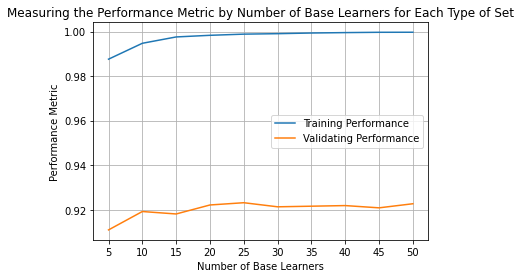

In [14]:
plt.xticks(base_learners)
plt.plot(base_learners,train_perf, label = 'Training Performance')
plt.plot(base_learners, valid_perf, label = 'Validating Performance')
plt.grid(True)
plt.legend()
plt.xlabel('Number of Base Learners')
plt.ylabel('Performance Metric')
plt.title('Measuring the Performance Metric by Number of Base Learners for Each Type of Set')
print('')

**Answer**: _The general trend of the performance is that it is increasing as the number of base learners increase for both the training and the testing. This is because since randomforest is an ensemble learning technique, it uses multiple resources to build a strong model. If there are more base learners to learn from, it's much more likely the stronger model developed would be more adapatable to new, unseen data._

Finally, test the best model on the testing set and print out the performance. How is the testing performance compared to the cross-validation performance?

In [15]:
np.random.seed(99)
# best performance was the 35 base learners scenario
bestforest = RandomForestClassifier(n_estimators = 50)

# test the best model on the testing set
bestforest.fit(xtrain,ytrain)
bestforest.score(xtest,ytest)

0.9217774513404333

**Answer**: _The testing performance here is around the same value as the cross-validation performance, but performas better than the decision tree._

## Problem 4

**This is an open-ended problem**

We are going to train a binary classifier for a set of red points and another binary classifier for a set of blue points. 

You are given a red dataset in '**R.csv**' and a blue dataset in '**B.csv**'.

a) Load the datasets. All datasets are 2-D with the last column containing the labels. 

In [16]:
red = pd.read_csv('R.csv', header = None)
red = red.rename(columns = {0:'C1',1:'C2',2:'C3'})
blue = pd.read_csv('B.csv', header = None)
blue = blue.rename(columns = {0:'C1',1:'C2',2:'C3'})

redx = red.iloc[:,:2]
redy = red.iloc[:,2]
bluex = blue.iloc[:,:2]
bluey = blue.iloc[:,2]
redxtrain, redxtest, redytrain, redytest= train_test_split(redx, redy, test_size = 0.2, random_state = 73)
bluextrain, bluextest, blueytrain, blueytest= train_test_split(bluex, bluey, test_size = 0.2, random_state = 73)

b) Train 2 classifiers, one for the red dataset and the other for the blue dataset. You are free to choose the learning algorithm from Scikit-Learn. 

In [17]:
np.random.seed(101)
# initiate the forest witht he default max depth
redforest = RandomForestClassifier(n_estimators = 100)
blueforest = RandomForestClassifier(n_estimators = 100)

# train the model for each color
redforest.fit(redxtrain,redytrain)
blueforest.fit(bluextrain,blueytrain)

# print the testing performance of each color classifier
print(redforest.score(redxtest,redytest))
print(blueforest.score(bluextest,blueytest))

0.8125
0.75


_Using the default number of estimators, I get a testing performance of 0.8125 for the Red dataset and a testing performance of 0.75 for the Blue Dataset._

What are the **decision boundaries** of the classifiers? Are they the same? What does it tell you about the difference between the **R** population and the **B** population. The **decision boundary** is the values that separate the positive instances from the negative instances. For example, if a classifier decides that all instances with feature value > 5 are positive and all instances with feature value < 5 are negative, then 5 is the decision boundary of that classifier. You can answer by showing/contrasting the decision boundaries on a figure/figures.

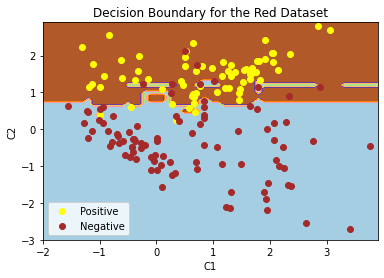

In [18]:
# plot the decision boundary for the Red Classifier
from sklearn.datasets import make_blobs

# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

# define bounds of the domain
min1 = -2
max1 = 4
min2 = -3
max2 = 3

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = redforest.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

# plot the scatter on top
pos_red = red[red['C3'] == 1]
neg_red = red[red['C3'] == 0]
plt.scatter(pos_red['C1'],pos_red['C2'],c = 'Yellow', label = 'Positive')
plt.scatter(neg_red['C1'],neg_red['C2'],c = 'Brown', label = 'Negative')
plt.legend()
plt.xlabel('C1')
plt.ylabel('C2')
plt.title('Decision Boundary for the Red Dataset')
print('')

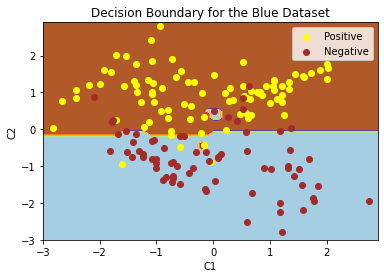

In [19]:
# plot the decision boundary for the blue classifier

# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

# define bounds of the domain
min1 = -3
max1 = 3
min2 = -3
max2 = 3

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = blueforest.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

# plot the scatter on top
pos_blue = blue[blue['C3'] == 1]
neg_blue = blue[blue['C3'] == 0]
plt.scatter(pos_blue['C1'],pos_blue['C2'],c = 'Yellow', label = 'Positive')
plt.scatter(neg_blue['C1'],neg_blue['C2'],c = 'Brown', label = 'Negative')
plt.legend()
plt.xlabel('C1')
plt.ylabel('C2')
plt.title('Decision Boundary for the Blue Dataset')
print('')

**Answer**: _For the Red Dataset, it looks like the decision boundary is C2 = 1 where all the red classified values are above that line and the non red are below that line. For the Blue Dataset, the decision boundary is C2 = 0 where all the blue classifed values are above that line and the non blue below that line. Since the decision boundaries are slightly different, it's important to note that the boundary for the Red population is slightly higher than that of the Blue population. Also, the boundary for the red population is much smaller and densely populated than that of the blue population. This is important to note because it means Red would skew a little more positive than Blue._ 

c) Now, imagine that we combine the **R** population and the **B** population into one single population. Given the classifiers that we trained from the previous part, how should the joint classifier be chosen so that it is fair to both groups? How would you express the fairness constraint explicitly? (**Note**: Don't worry about right or wrong here)

As a motivation, consider a real example in which you work for a financial company that accepts loan application. You have data of people from two different areas of your city, each with a different social-economic situation. Normally, our company has internal processes to deal with people from either areas (2 classifiers where positive means granting loan and negative means no loan). However, due to COVID-19, we are not in a good financial state right now so we can only grant loans to a limited number of people from either areas. If we only care about profit, we will just give loans to those in the better area, but is it socially fair to those from the other area? How should we adjust/combine our internal processes (the classifiers) to process the applications in a fair way.

**Answer**: _After reading the example given after the question, I thought about possibly combining the two areas disregarding their socioeconomic situation. However, since we do not know what features the financial company is using to classifiy the loan-giving process, its possible that those with a higher/better socioeconomic status will have higher values which make them more relatively likely to recevie loans than the area with the lower socio-economic status. Im thinking that in order to reduce bias and express fairness, we would figure out a way to standardize the feature values so both areas could be combined on the same decision boundary._ 

_So going back to the Red vs. Blue Classifier, it seems as tho the Red dataset has a higher possibility of being positive since its boundary is placed more positive than Blue. This would mean that if we were to combine the two populations into the same dataset, the Red would be favored more than Blue in positivity. So if we were to somehow standardize the points on the plane so theyre centered around zero for both populations, it would eliminate some positive skewness/bias for either group. Another thought would be to add another feature that will help weigh the boundary and not skew it to favoring the Red population._

**Step 1**: As a first step, I am going to see what happens when I just combine the two datasets and create a model like that.

In [20]:
# concatenate them into one table
total = pd.concat([red,blue])
# add the class label to the table for visualization purposes
total['class'] = ['R']*160 + ['B'] *160

# separate between features and the label
totx = total.iloc[:,:2]
toty = total.iloc[:,2]

# create random forest
np.random.seed(41)
totalforest = RandomForestClassifier(n_estimators = 100)
totalforest.fit(totx,toty)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

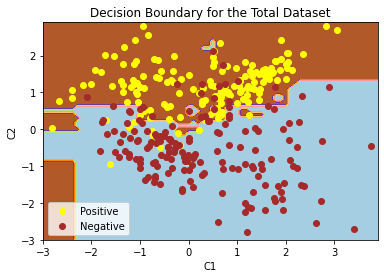

In [21]:
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

# define bounds of the domain
min1 = -3
max1 = 4
min2 = -3
max2 = 3

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = totalforest.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

# plot the scatter on top
pos = total[total['C3'] == 1]
neg = total[total['C3'] == 0]
plt.scatter(pos['C1'],pos['C2'],c = 'Yellow', label = 'Positive')
plt.scatter(neg['C1'],neg['C2'],c = 'Brown', label = 'Negative')
plt.legend()
plt.xlabel('C1')
plt.ylabel('C2')
plt.title('Decision Boundary for the Total Dataset')
print('')

**Step 1 Comment**: _Based on the plot above, the decision boundary is at about C2 = 0 on the left part of the plot, but the slope looks to be increasing very slowly as C1 increases._ 

**Step 2**: _Now I will plot the points with their corresponding class label, to show if there are any differences._

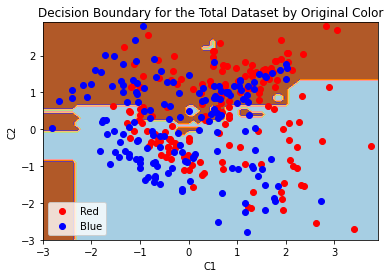

In [22]:
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

# define bounds of the domain
min1 = -3
max1 = 4
min2 = -3
max2 = 3

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = totalforest.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

# plot the scatter on top
red_use = total[total['class'] == 'R']
blue_use = total[total['class'] == 'B']
plt.scatter(red_use['C1'],red_use['C2'],c = 'Red', label = 'Red')
plt.scatter(blue_use['C1'],blue_use['C2'],c = 'Blue', label = 'Blue')
plt.legend()
plt.xlabel('C1')
plt.ylabel('C2')
plt.title('Decision Boundary for the Total Dataset by Original Color')
print()

**Step 2 Comment**: _Looking at the plot above, I see the Blue points tend to populate more on the left where the decision boundary trends a little lower and the Red points more on the right. Just based off of sight, it seems there are just a little more red points on the positive boundary than blue ones._

In [23]:
print("Num of Red Classified Observations: "+str(sum(red_use['C3'])))
print("Num of Blue Classified Observations: "+str(sum(blue_use['C3'])))
print("Num of Positive Red Values: "+str(sum(red_use['C2'] > 0)))
print("Num of Positive Blue Values: "+str(sum(blue_use['C2'] > 0)))

Num of Red Classified Observations: 67
Num of Blue Classified Observations: 89
Num of Positive Red Values: 98
Num of Positive Blue Values: 91


**Step 2 Comment**: _After calculating some values about the data and the trends, I see that although there are significantly more classified Blue observations, there are more Positive Red Values. This means that it is more likely to be classified as a Blue object than as a Red object, but its more likely to be positive as a Red Object. There is a possibility that standardizing the data so they revolve around the same mean may decrease bias and increase fairness with the classification._ 

**Step 3**: _I will try and standardize and see how it works._

In [24]:
# standardize red and blue datasets
sred = pd.DataFrame({'C1':(red.C1 - np.mean(red.C1))/np.std(red.C1),
                     'C2':(red.C2 - np.mean(red.C2))/np.std(red.C2),
                    'C3':red.C3, 'class':['R']*160})
sblue = pd.DataFrame({'C1':(blue.C1 - np.mean(blue.C1))/np.std(blue.C1),
                     'C2':(blue.C2 - np.mean(blue.C2))/np.std(blue.C2),
                    'C3':blue.C3, 'class':['B']*160})

# concatenate them into one table
total_s = pd.concat([sred,sblue])

# separate between features and the label
totalx = total_s.iloc[:,:2]
totaly = total_s.iloc[:,2]

In [25]:
np.random.seed(156)

# train the joint classifier
jointforest = RandomForestClassifier(n_estimators = 100)

# train the model for each color
jointforest.fit(totalx,totaly)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

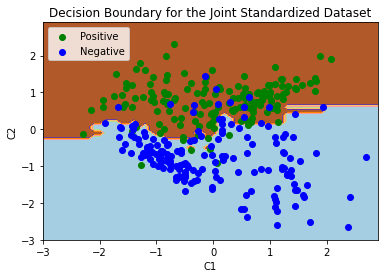

In [26]:
#generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

# define bounds of the domain
min1 = -3
max1 = 3
min2 = -3
max2 = 3

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = jointforest.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

# plot the scatter on top
pos = total_s[total_s['C3'] == 1]
neg = total_s[total_s['C3'] == 0]
plt.scatter(pos['C1'],pos['C2'],c = 'green', label = 'Positive')
plt.scatter(neg['C1'],neg['C2'],c = 'blue', label = 'Negative')
plt.legend()
plt.xlabel('C1')
plt.ylabel('C2')
plt.title('Decision Boundary for the Joint Standardized Dataset')
print()

**Step 3 Comment**: _Above, I see the boundary being 0, similar to the boundary for Blue which had less positive skew than Red. But it looks if I drew a line, it would also have a positive slope. Now for visualization purposes, I will plot the different colors on the same decision boundary to see if there is any obvious bias._

**Step 4**: _Now I will plot the points with their corresponding class label, to show if there are any differences in the standardized data._

Text(0.5, 1.0, 'Decision Boundary for the Joint Dataset')

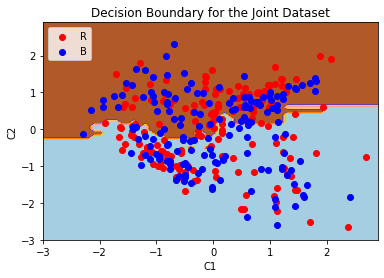

In [27]:
#generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

# define bounds of the domain
min1 = -3
max1 = 3
min2 = -3
max2 = 3

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = jointforest.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

# plot the scatter on top
r = total_s[total_s['class'] == "R"]
b = total_s[total_s['class'] == "B"]
plt.scatter(r['C1'],r['C2'],c = 'red', label = 'R')
plt.scatter(b['C1'],b['C2'],c = 'blue', label = 'B')
plt.legend()
plt.xlabel('C1')
plt.ylabel('C2')
plt.title('Decision Boundary for the Joint Dataset')

In [28]:
print("Num of Red Classified Observations: "+str(sum(r['C3'])))
print("Num of Blue Classified Observations: "+str(sum(b['C3'])))
print("Num of Positive Red Values: "+str(sum(r['C2'] > 0)))
print("Num of Positive Blue Values: "+str(sum(b['C2'] > 0)))

Num of Red Classified Observations: 67
Num of Blue Classified Observations: 89
Num of Positive Red Values: 84
Num of Positive Blue Values: 88


**Final Comment**: _After showing the spread of Red and Blue in the combined standardized population on top of the decision boundaries, its clear that standardizing the dataset shows a little bit of improvement. For example, without standardizing, we had 7 more positive values/positions for Red than Blue. This did not match the number of Red classified observations of 67 and Blue classified observations of 89. However when we standardize, there are more relatively higher Blue values which match the pattern of actually classified observations. Although we do not completely know the relationship between being classified as positive and our hypothesized decision boundary, adding another feature to this model which will level out the slight bias for Red values would also add to this direction of thinking about fairness._

_In addition, although the decision boundary is occuring where the overall classification error is minimized, it isnt always fair. For example, if the decision boundary did a good job of covering the area for the positively classified values, what happens if the negatively classifed boundaries are a lot more worse than the other one? In a situation where more red values are likely to be positive orginally and the lowest decision boundary is 0, the model is biased towards Red values. However, when we standardize, the number of positive values for each color is around the same, leaving the classification more fair._